In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import font_manager
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [2]:
import pandas as pd


In [6]:
df = pd.read_csv('hawaii.csv')

In [5]:
def remove_stopwords(text, stop_words):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [12]:
country_data = df[df['Country'] == 'China']

In [8]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
custom_stop_words = {'said', 'will', 'new'}
stop_words = stop_words.union(custom_stop_words)

In [15]:
country_data['text'] = country_data['Article Body'].apply(lambda x: remove_stopwords(str(x), stop_words))

/tmp/ipykernel_29802/3190951205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['text'] = country_data['Article Body'].apply(lambda x: remove_stopwords(str(x), stop_words))


In [16]:
country_data

,Country,Press,Reporter,Category,Submission Date,Submission Time,Last Edited Date,Last Edited Time,Article Title,Article Body,Size,url,text
0,China,People.cn,"Tian Yi,Liang Jun",economy,20240613.0,915.0,0.0,0.0,More policy support needed to boost demand ami...,\nA consumer selects tomatoes at a supermarket...,4233,http://en.people.cn/n3/2024/0613/c90000-201807...,consumer selects tomatoes supermarket Linyi ci...
1,China,People.cn,"Zhang Kaiwei, Liang Jun",economy,20240613.0,913.0,0.0,0.0,World Intelligence Expo to be held in Tianjin,\nA staff member reacts with a robot at the fi...,1713,http://en.people.cn/n3/2024/0613/c90000-201807...,staff member reacts robot fifth World Intellig...
2,China,People.cn,"Zhang Kaiwei, Liang Jun",economy,20240613.0,829.0,0.0,0.0,China's southern gateway region eyes high-qual...,"\nAn aerial drone photo taken on May 19, 2024 ...",2361,http://en.people.cn/n3/2024/0613/c90000-201806...,"aerial drone photo taken May 19, 2024 shows co..."
3,China,People.cn,"Zhang Kaiwei, Liang Jun",economy,20240613.0,827.0,0.0,0.0,China now has 85 national-level tourist resorts,\nTourists visit the Zhangjiajie National Fore...,1216,http://en.people.cn/n3/2024/0613/c90000-201806...,Tourists visit Zhangjiajie National Forest Par...
4,China,People.cn,"Zhang Kaiwei, Liang Jun",economy,20240613.0,823.0,0.0,0.0,EU tariffs on Chinese EVs opposed across Europe,"\nThis file photo taken on June 3, 2024 shows ...",5929,http://en.people.cn/n3/2024/0613/c90000-201806...,"file photo taken June 3, 2024 shows lock chain..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,China,People.cn,"Tian Yi, Liang Jun",military,20240222.0,1002.0,0.0,0.0,China and India militaries to 'turn the page',\nIndian and Chinese national flags flutter si...,954,http://en.people.cn/n3/2024/0222/c90000-201359...,Indian Chinese national flags flutter side sid...
616,China,People.cn,"Zhang Kaiwei, Zhong Wenxing",military,20240221.0,1633.0,0.0,0.0,"U.S., British warplanes strike Houthi targets ...","SANAA, Feb. 21 (Xinhua) -- U.S. and British wa...",984,http://en.people.cn/n3/2024/0221/c90000-201357...,"SANAA, Feb. 21 (Xinhua) -- U.S. British warpla..."
617,China,People.cn,"Zhang Kaiwei, Zhong Wenxing",military,20240221.0,1607.0,0.0,0.0,China sends new naval fleet for escort mission...,"GUANGZHOU, Feb. 21 (Xinhua) -- The 46th fleet ...",835,http://en.people.cn/n3/2024/0221/c90000-201356...,"GUANGZHOU, Feb. 21 (Xinhua) -- 46th fleet Chin..."
618,China,People.cn,"Tian Yi, Zhong Wenxing",military,20240221.0,1042.0,0.0,0.0,Armored vehicles in maneuver training exercise,\nArmored vehicles attached to a regiment unde...,392,http://en.people.cn/n3/2024/0221/c90000-201355...,Armored vehicles attached regiment PLA Xinjian...


In [18]:
country_data.iloc[0].loc['text']

'consumer selects tomatoes supermarket Linyi city, East China\'s Shandong province June 12. [Photo/Xinhua] China\'s consumer prices likely remain steady, mild increase following months, economy track solid recovery year series stimulus policy measures gradually taking effect, analysts said. also noted persistently low price levels indicate uneven recovery world\'s second-largest economy, highlighting need policy support address insufficient demand. emphasized policy efforts focus boosting consumption accelerating issuance ultra-long-term treasury bonds local government special bonds. comments came data National Bureau Statistics showed Wednesday country\'s consumer price index, main gauge inflation, rose 0.3 percent year-on-year May, rise par April. growth core CPI, excludes volatile food energy prices deemed better gauge supply-demand relationship economy, rose 0.6 percent year-on-year May, 0.7 percent rise April. "Among eight major expenditure categories within CPI, food prices trans

In [19]:
country_data.iloc[0].loc['text'].split()

['consumer',
 'selects',
 'tomatoes',
 'supermarket',
 'Linyi',
 'city,',
 'East',
 "China's",
 'Shandong',
 'province',
 'June',
 '12.',
 '[Photo/Xinhua]',
 "China's",
 'consumer',
 'prices',
 'likely',
 'remain',
 'steady,',
 'mild',
 'increase',
 'following',
 'months,',
 'economy',
 'track',
 'solid',
 'recovery',
 'year',
 'series',
 'stimulus',
 'policy',
 'measures',
 'gradually',
 'taking',
 'effect,',
 'analysts',
 'said.',
 'also',
 'noted',
 'persistently',
 'low',
 'price',
 'levels',
 'indicate',
 'uneven',
 'recovery',
 "world's",
 'second-largest',
 'economy,',
 'highlighting',
 'need',
 'policy',
 'support',
 'address',
 'insufficient',
 'demand.',
 'emphasized',
 'policy',
 'efforts',
 'focus',
 'boosting',
 'consumption',
 'accelerating',
 'issuance',
 'ultra-long-term',
 'treasury',
 'bonds',
 'local',
 'government',
 'special',
 'bonds.',
 'comments',
 'came',
 'data',
 'National',
 'Bureau',
 'Statistics',
 'showed',
 'Wednesday',
 "country's",
 'consumer',
 'price

In [21]:
from collections import Counter
cntr = Counter(country_data.iloc[0].loc['text'].split())
cntr.most_common(5)

[('percent', 9), ('consumer', 8), ('prices', 7), ('recovery', 6), ('price', 6)]

In [27]:
# 문서 전체에서 가장 많이 나온 단어들은?

country_data['text'].str.join('')

0      consumer selects tomatoes supermarket Linyi ci...
1      staff member reacts robot fifth World Intellig...
2      aerial drone photo taken May 19, 2024 shows co...
3      Tourists visit Zhangjiajie National Forest Par...
4      file photo taken June 3, 2024 shows lock chain...
                             ...                        
615    Indian Chinese national flags flutter side sid...
616    SANAA, Feb. 21 (Xinhua) -- U.S. British warpla...
617    GUANGZHOU, Feb. 21 (Xinhua) -- 46th fleet Chin...
618    Armored vehicles attached regiment PLA Xinjian...
619    Fighter jets attached aviation brigade air for...
Name: text, Length: 620, dtype: object

In [28]:
## text ㅔ서 부터 다시

country_data['text'] = country_data['Article Body'].apply(lambda x: remove_stopwords(str(x), stop_words).split())

/tmp/ipykernel_29802/2243346068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['text'] = country_data['Article Body'].apply(lambda x: remove_stopwords(str(x), stop_words).split())


In [29]:
country_data['text']

0      [consumer, selects, tomatoes, supermarket, Lin...
1      [staff, member, reacts, robot, fifth, World, I...
2      [aerial, drone, photo, taken, May, 19,, 2024, ...
3      [Tourists, visit, Zhangjiajie, National, Fores...
4      [file, photo, taken, June, 3,, 2024, shows, lo...
                             ...                        
615    [Indian, Chinese, national, flags, flutter, si...
616    [SANAA,, Feb., 21, (Xinhua), --, U.S., British...
617    [GUANGZHOU,, Feb., 21, (Xinhua), --, 46th, fle...
618    [Armored, vehicles, attached, regiment, PLA, X...
619    [Fighter, jets, attached, aviation, brigade, a...
Name: text, Length: 620, dtype: object

In [62]:
counterVectorizer = CountVectorizer(max_features=30)

dtm = counterVectorizer.fit_transform(country_data['text'].str.join(''))

In [63]:
dtm_dense = dtm.todense()
dtm_dense

matrix([[0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 2, 0, 0],
        [0, 0, 1, ..., 2, 0, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        [3, 0, 0, ..., 0, 0, 0]])

In [64]:
dtm_name = counterVectorizer.get_feature_names_out()

dtm_name

array(['2024', 'added', 'beijing', 'china', 'chinamil', 'cn', 'com',
       'dollars', 'eastchina', 'eng', 'france', 'however', 'japan',
       'june10', 'june11', 'june4', 'june5', 'june6', 'june7',
       'losangeles', 'may24', 'may27', 'on', 'photo', 'pla', 'said',
       'sliberationarmy', 'xinhua', 'year', 'zhangxiaoyu'], dtype=object)

In [65]:
dtm_dense.shape

(620, 30)

In [66]:
edgelist = np.dot(dtm_dense.T, dtm_dense)
edgelist

matrix([[8213,    5,   35,  486,  564,  664,  664,   23,  412,  564,
          372,   53, 1765,  253,  648,  346,  503,  260,  505,  321,
          876,  394,   41,  195,  433,  122,  433, 7716,  125, 1718],
        [   5,   58,   14,   14,    0,    0,    0,    8,    8,    0,
            1,   12,    2,    6,    6,    4,    1,    6,    4,    3,
            0,    2,    2,    2,    0,   57,    0,   53,   15,    0],
        [  35,   14,  141,   70,    0,    2,    1,   23,    7,    0,
            2,   19,    3,    9,   23,    3,    5,   16,   12,    0,
            6,    1,   11,    0,   14,   40,   14,  181,   17,    0],
        [ 486,   14,   70,  640,    0,    0,    0,   31,   18,    0,
           40,   13,   61,   12,   35,   37,   16,   20,  126,    0,
           32,    0,   68,   11,    3,   78,    4,  547,   64,   49],
        [ 564,    0,    0,    0,  708,  708,  708,    0,    0,  708,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,   25,    

In [67]:
ngraph = nx.Graph(edgelist[:,:])
ngraph_map = dict(zip(ngraph.nodes(), dtm_name))

ngraph_map

{0: '2024',
 1: 'added',
 2: 'beijing',
 3: 'china',
 4: 'chinamil',
 5: 'cn',
 6: 'com',
 7: 'dollars',
 8: 'eastchina',
 9: 'eng',
 10: 'france',
 11: 'however',
 12: 'japan',
 13: 'june10',
 14: 'june11',
 15: 'june4',
 16: 'june5',
 17: 'june6',
 18: 'june7',
 19: 'losangeles',
 20: 'may24',
 21: 'may27',
 22: 'on',
 23: 'photo',
 24: 'pla',
 25: 'said',
 26: 'sliberationarmy',
 27: 'xinhua',
 28: 'year',
 29: 'zhangxiaoyu'}

/home/byulzzi/Documents/hawaii-project/venv/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


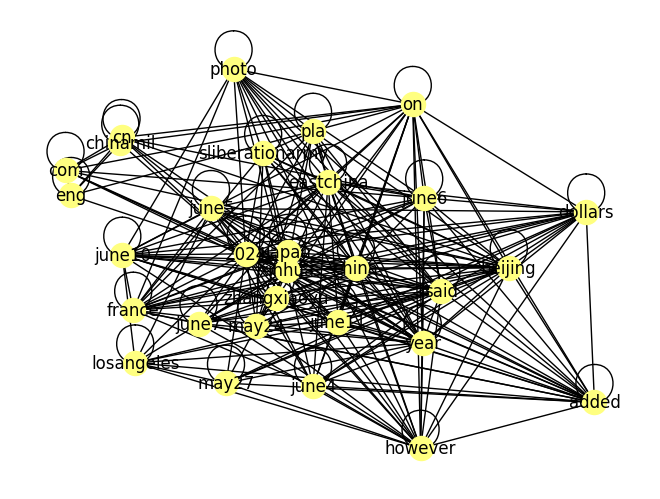

In [69]:
nx.draw(ngraph, labels = ngraph_map, with_labels=True, node_color=[1,1,0.5] )
plt.show()